[View in Colaboratory](https://colab.research.google.com/github/baruaranojoy/sentiment_analysis_ML_assignment_4/blob/master/sentiment_assign.ipynb)

In [1]:
from google.colab import files
files.upload()

Saving assignment4.zip to assignment4.zip


In [2]:
!ls

assignment4.zip  sample_data


In [3]:
!unzip assignment4.zip

Archive:  assignment4.zip
   creating: assignment4/
  inflating: assignment4/processing2.ipynb  
  inflating: assignment4/data_processed.txt  
  inflating: assignment4/preprocessing1.ipynb  
   creating: assignment4/data/
   creating: assignment4/data/test/
  inflating: assignment4/data/test/test.ft.txt  
   creating: assignment4/.ipynb_checkpoints/
  inflating: assignment4/.ipynb_checkpoints/processing2-checkpoint.ipynb  
  inflating: assignment4/.ipynb_checkpoints/preprocessing1-checkpoint.ipynb  
  inflating: assignment4/preprocessing1.py  


In [4]:
cd assignment4/

/content/assignment4


In [5]:
!ls

data		    preprocessing1.ipynb  processing2.ipynb
data_processed.txt  preprocessing1.py


In [8]:
import pandas as pd
import numpy as np
import os
import nltk
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

from tqdm import tqdm
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
stop_words = stopwords.words("english")
punctuations = [',' , '.', '!', '"', ':', "'", '?', '/', "''", '`', '``', '#', '.']
numbers_ = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
stop_words = stop_words + punctuations + numbers_
all_words_dictionary = {}
final_vocabulary = []
final_vocab_count = {}

df = pd.DataFrame(columns=['Sentiment_class_label', 'Review_Text', 'Tokens', 'Word_Length'])

working_directory = os.getcwd()
data_location = "data/test/test.ft.txt"

In [0]:
fopen = open(data_location, "r")
data = fopen.read()
data = data.split("\n")
fopen.close()

In [0]:
def remove_stopwords(sentence):
    return [ token for token in nltk.word_tokenize(sentence) if token.lower() not in stop_words ]

In [0]:
def process(review):
    sentiment = review[:10]
    review = review[11:]
    token = remove_stopwords(review)
    return sentiment, review, token, len(token)

In [13]:
fopen = open("data_processed.txt", "w")
#fopen.write("Sentiment_class_label, Review_Text, Tokens, Word_Length" + "\n")

data = data[:len(data) - 1]
for k in tqdm(range(len(data))):
    #print (len(data[k]))
    sentiment, review, token, length = process(data[k])
    toksent = ""
    for m in range(len(token)):
        toksent = toksent + token[m] + " "
    
    fopen.write(str(sentiment) + "/*~*/" + str(review) + "/*~*/" + str(toksent) + "/*~*/" + str(length) + "\n")
    
    if k > 20000:
        break

fopen.close()
#data_25 = df[df.Word_Length <= 25]

  5%|▌         | 20001/400000 [00:21<07:02, 898.60it/s]

In [0]:
fopen = open("data_processed.txt", "r")
data_ = fopen.read()
data_ = data_.split("\n")
fopen.close()

data_ = data_[:len(data_) - 1]

In [15]:
data_25 = pd.DataFrame(columns=['Sentiment_class_label', 'Review_Text', 'Tokens', 'Word_Length'])
counter = 0
for k in tqdm(range(len(data_))):
    dp = data_[k].split("/*~*/")
    df.loc[k] = [dp[0], dp[1], dp[2], int(dp[3])]
    if int(dp[3]) <= 25:
        data_25.loc[counter] = [dp[0], dp[1], dp[2], int(dp[3])]
        counter += 1


100%|██████████| 20002/20002 [02:11<00:00, 152.28it/s]

In [16]:
tok_sent_25 = list(data_25['Tokens'])

vocab = []
unique_vocab = []

for k in tqdm(range(len(tok_sent_25))):
    a = tok_sent_25[k].split(" ")
    a = a[:len(a) - 1]
    for m in range(len(a)):
        vocab.append(a[m])

unique_vocab = list(set(list(vocab)))
print ("Size of total vocabulary : ", len(vocab))
print ("Unique vocabulary size : ", len(unique_vocab))

for k in range(len(unique_vocab)):
    all_words_dictionary[str(unique_vocab[k])] = 0

for k in range(len(vocab)):
    all_words_dictionary[str(vocab[k])] += 1

counter = 0
for k in range(len(unique_vocab)):
    if all_words_dictionary[str(unique_vocab[k])] >= 5:
        #print (unique_vocab[k], all_words_dictionary[str(unique_vocab[k])])
        final_vocabulary.append(unique_vocab[k])
        final_vocab_count[str(unique_vocab[k])] = counter
        counter += 1


100%|██████████| 5684/5684 [00:00<00:00, 128980.10it/s]

Size of total vocabulary :  102054
Unique vocabulary size :  19167


In [0]:
_label_ = []
_datas_ = []

In [18]:
for k in tqdm(range(len(df) - 1)):
    d_ = df.iloc[k]
    _unit_label_ = d_['Sentiment_class_label']
    _unit_reviw_ = d_['Tokens']
    vector = [0] * len(final_vocabulary)
    _unit_reviw_ = _unit_reviw_.split(" ")
    _unit_reviw_ = _unit_reviw_[:len(_unit_reviw_) - 1]
    for m in range(len(_unit_reviw_)):
        if _unit_reviw_[m] in final_vocabulary:
            vector[final_vocab_count[str(_unit_reviw_[m])]] = 1
    
    if _unit_label_ == "__label__1":
        _label_.append([1, 0])
    else:
        _label_.append([0, 1])
    
    _datas_.append(list(vector))


100%|██████████| 20001/20001 [00:45<00:00, 444.02it/s]

In [0]:
trainX = _datas_[:int(len(_datas_) * 0.6)]
trainY = _label_[:int(len(_label_) * 0.6)]

validateX = _datas_[int(len(_datas_) * 0.6) : int(len(_datas_) * 0.8)]
validateY = _label_[int(len(_label_) * 0.6) : int(len(_label_) * 0.8)]

testX = _datas_[int(len(_datas_) * 0.8):]
testY = _label_[int(len(_label_) * 0.8):]

trainX = np.array(trainX)
trainY = np.array(trainY)
validateX = np.array(validateX)
validateY = np.array(validateY)
testX = np.array(testX)
testY = np.array(testY)

In [20]:
print (len(final_vocabulary))
print (len(trainX[0]))

2936
2936


In [0]:
# dont go for 4000 neuron layer

model = Sequential()

model.add(Dense(len(final_vocabulary), input_dim=len(final_vocabulary), activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.3))

model.add(Dense(1000, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.3))

model.add(Dense(300, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.3))

model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.3))

model.add(Dense(2, activation='softmax'))



model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [77]:
history = model.fit(trainX, trainY, epochs=1000, batch_size=1000, verbose=1, validation_data = (validateX, validateY), shuffle = True)

Train on 12000 samples, validate on 4000 samples
Epoch 1/1000
12000/12000 [==============================] - 1s 69us/step - loss: 0.6688 - acc: 0.5894 - val_loss: 0.6501 - val_acc: 0.6810
Epoch 2/1000
12000/12000 [==============================] - 1s 65us/step - loss: 0.6663 - acc: 0.5950 - val_loss: 0.6487 - val_acc: 0.6830
Epoch 3/1000
12000/12000 [==============================] - 1s 60us/step - loss: 0.6645 - acc: 0.5972 - val_loss: 0.6472 - val_acc: 0.6847
Epoch 4/1000
12000/12000 [==============================] - 1s 60us/step - loss: 0.6655 - acc: 0.6023 - val_loss: 0.6457 - val_acc: 0.6862
Epoch 5/1000
12000/12000 [==============================] - 1s 62us/step - loss: 0.6660 - acc: 0.5965 - val_loss: 0.6443 - val_acc: 0.6885
Epoch 6/1000
12000/12000 [==============================] - 1s 62us/step - loss: 0.6620 - acc: 0.6080 - val_loss: 0.6426 - val_acc: 0.6913
Epoch 7/1000
12000/12000 [==============================] - 1s 64us/step - loss: 0.6653 - acc: 0.5955 - val_loss: 0.6

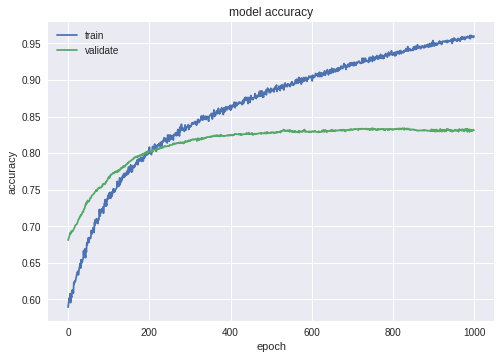

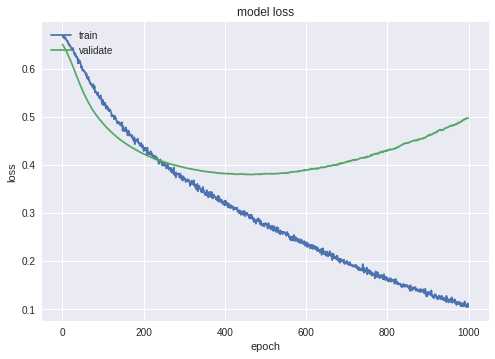

In [78]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [79]:
scores_train = model.evaluate(trainX, trainY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

scores_train = model.evaluate(validateX, validateY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

scores_train = model.evaluate(testX, testY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

12000/12000 [==============================] - 2s 138us/step
Train acc: 99.60%
4000/4000 [==============================] - 1s 141us/step
Train acc: 83.12%
4001/4001 [==============================] - 1s 149us/step
Train acc: 83.88%
